In [1]:
import pandas as pd
import numpy as np
import psycopg2.extras
import pandas._testing as tm
import seaborn as sns
import matplotlib.pyplot as plt


## INTRODUCTION
* The country database is made up 10 columns and 167 rows. The columns are:
    * COUNTRY NAME: This is unique entries for each country
    
    * CHILD MORTALITY: It can be refer to  the under-five mortality rate refers to the probability of a child dying between birth and exactly 5 years of age
    
    * EXPORTS:This are goods and services that are produced in one country and sold to buyers in another.
    
    * HEALTH: THis is the total wellbegin of people living in a geographical location
    
    * IMPORTS: This is a good or service bought in one country that was produced in another.
    
    * INCOME: Gross national income (GNI) is defined as gross domestic product, plus net receipts from abroad of compensation of employees, property income and net taxes less subsidies on production.
    
    * INFLATION: Inflation is the rate of increase in prices over a given period of time. Inflation is typically a broad measure
    * LIFE EXPECTANCY: This is based on an estimate of the average age that members of a particular population group will be when they die.
    
    * FERTILIY: This is the average number of children that women of childbearing age give birth to in a given country
    
    * GDP: This is the final value of the goods and services produced within the geographic boundaries of a country during a specified period of time, normally a year. GDP growth rate is an important indicator of the economic performance of a country.

## OBJECTIVE

* To determine the population growth of countries in world
* to determine the economic activities
* To determine the economic stability
* To determine the nation wealth


## RESEARCH QUESTION

* what is the relationship between child mortality and fertility?
* what is the relationship between export and import?
* what is the relationship  between the GDP and GNI?
*  what is the relationship between inflation and income
* which country have the highest life expectancy
* what is the relationship between life expectancy and GDP

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [3]:
df = pd.read_csv('C:\\Users\\USER\\Desktop\\project 2\\country_data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df['country'].value_counts()

Algeria             1
Macedonia, FYR      1
Armenia             1
Poland              1
Albania             1
                   ..
Congo, Dem. Rep.    1
Venezuela           1
Maldives            1
Morocco             1
Croatia             1
Name: country, Length: 167, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.isnull().values.any()

False

In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
## renaming the column

Data = df.rename({'country': 'Country_name', 'child_mort': 'Child_Mortality', 'exports ': 'Products_Export', 
                'health': 'Health', 'imports': 'Products_Import', 
                'income': 'income', 'inflation': 'inflation', 'life_expec' : 'life_expectancy', 
                'total_fer': 'total_fertility',  'gdpp': 'GDP' },  axis=1 )

In [9]:
Data.head()

,Country_name,Child_Mortality,exports,Health,Products_Import,income,inflation,life_expectancy,total_fertility,GDP
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
corda = Data.corr(method = 'pearson')
corda

,Child_Mortality,exports,Health,Products_Import,income,inflation,life_expectancy,total_fertility,GDP
Child_Mortality,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
Health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
Products_Import,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expectancy,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fertility,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
GDP,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<AxesSubplot:>

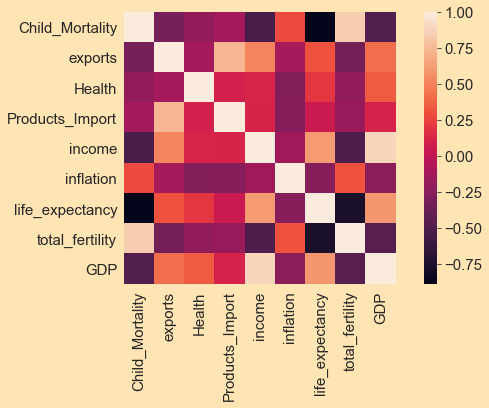

In [11]:
## correlation Map

cor = Data.corr(method = 'pearson')
f, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype = np.bool), square = True, ax = ax)

In [12]:
mask_dev = Data["GDP"] >= 12_000
mask_developed = Data[mask_dev]

In [13]:
mask_developed.head(4)

,Country_name,Child_Mortality,exports,Health,Products_Import,income,inflation,life_expectancy,total_fertility,GDP
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000


In [14]:
mask_non = Data["GDP"] <= 11_900
mask_developing = Data[mask_non]
mask_developing.head()

,Country_name,Child_Mortality,exports,Health,Products_Import,income,inflation,life_expectancy,total_fertility,GDP
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300


Text(0.5, 0, 'FERTILITY')

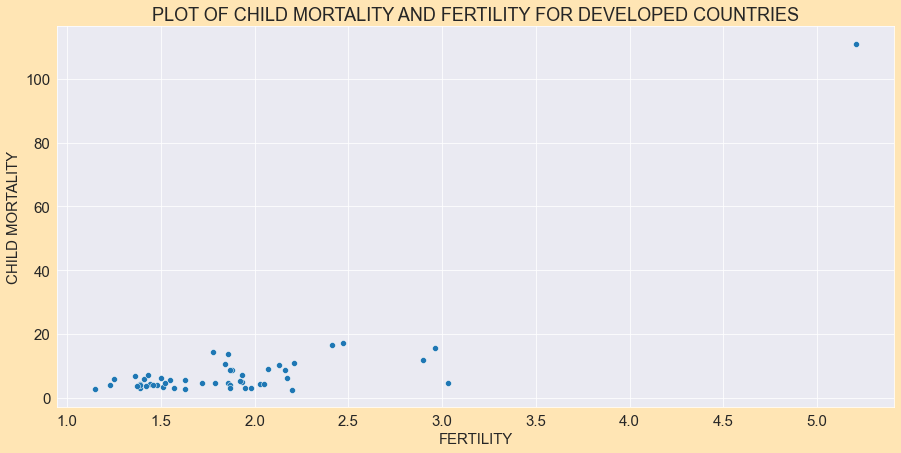

In [15]:
## the plot between  child mortalty and fertility for developed counties  
plt.rcParams['figure.figsize'] = (15,7)
plt.title('PLOT OF CHILD MORTALITY AND FERTILITY FOR DEVELOPED COUNTRIES')
sns.scatterplot(y= 'Child_Mortality', x = 'total_fertility', data = mask_developed)



plt.ylabel('CHILD MORTALITY')
plt.xlabel('FERTILITY')

Text(0.5, 0, 'FERTILITY')

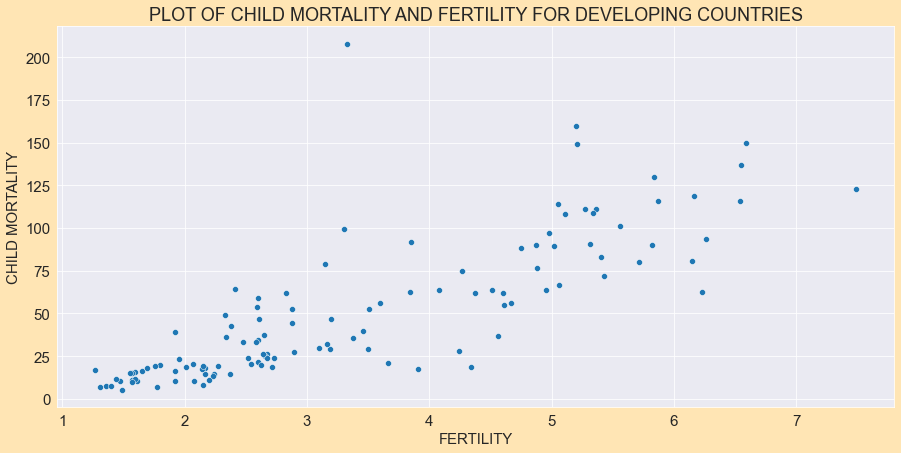

In [16]:
## the plot between  child mortalty and fertility for developing counties  
plt.rcParams['figure.figsize'] = (15,7)
plt.title('PLOT OF CHILD MORTALITY AND FERTILITY FOR DEVELOPING COUNTRIES')
sns.scatterplot(y= 'Child_Mortality', x = 'total_fertility', data = mask_developing)



plt.ylabel('CHILD MORTALITY')
plt.xlabel('FERTILITY')

Text(0.5, 0, 'IMPORTED PRODUCTS')

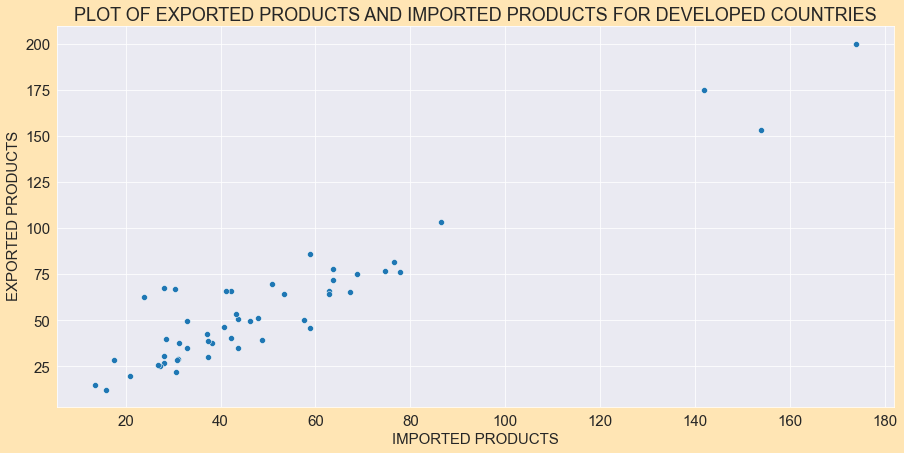

In [17]:
## the plot between  export and import for developed counties  
plt.rcParams['figure.figsize'] = (15,7)
plt.title('PLOT OF EXPORTED PRODUCTS AND IMPORTED PRODUCTS FOR DEVELOPED COUNTRIES')
sns.scatterplot(y= 'exports', x = 'Products_Import', data = mask_developed)



plt.ylabel(' EXPORTED PRODUCTS')
plt.xlabel('IMPORTED PRODUCTS')

Text(0.5, 0, 'IMPORTED PRODUCTS')

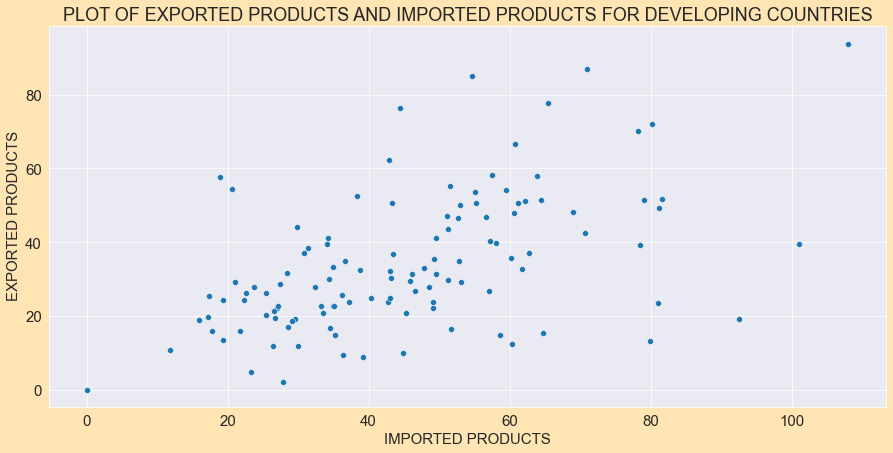

In [18]:
## the plot between  export and import for developing counties  
plt.rcParams['figure.figsize'] = (15,7)
plt.title('PLOT OF EXPORTED PRODUCTS AND IMPORTED PRODUCTS FOR DEVELOPING COUNTRIES')
sns.scatterplot(y= 'exports', x = 'Products_Import', data = mask_developing)



plt.ylabel(' EXPORTED PRODUCTS')
plt.xlabel('IMPORTED PRODUCTS')

Text(0.5, 0, 'GROSS NATIONAL INCOME')

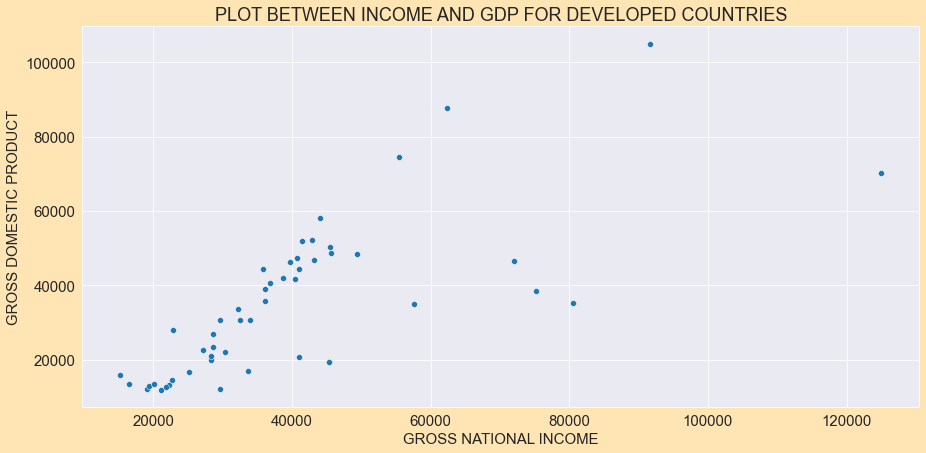

In [19]:
## plot between income and GDP for the developed countries

plt.rcParams['figure.figsize'] = (15,7)
plt.title('PLOT BETWEEN INCOME AND GDP FOR DEVELOPED COUNTRIES')
sns.scatterplot(x= 'income', y = 'GDP', data = mask_developed)



plt.ylabel('GROSS DOMESTIC PRODUCT')
plt.xlabel('GROSS NATIONAL INCOME')

Text(0.5, 0, 'GROSS NATIONAL INCOME')

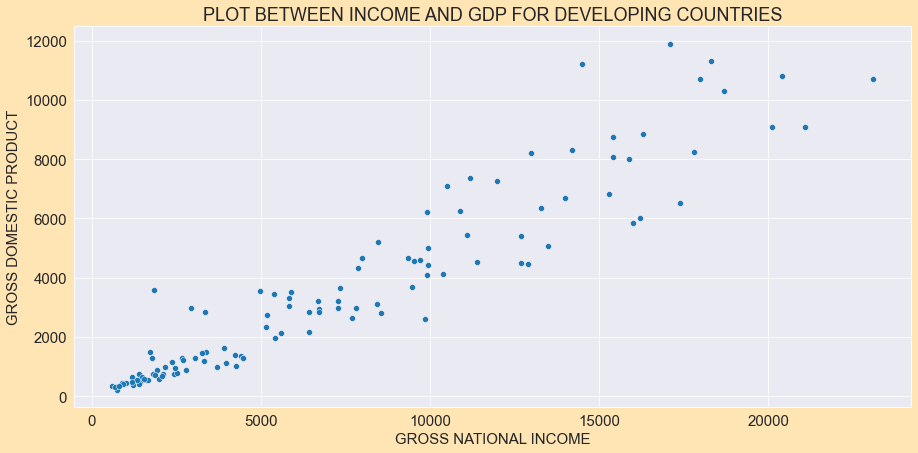

In [20]:
## plot between income and GDP for the developing countries

plt.rcParams['figure.figsize'] = (15,7)
plt.title('PLOT BETWEEN INCOME AND GDP FOR DEVELOPING COUNTRIES')
sns.scatterplot(x= 'income', y = 'GDP', data = mask_developing)



plt.ylabel('GROSS DOMESTIC PRODUCT')
plt.xlabel('GROSS NATIONAL INCOME')

Text(0, 0.5, 'GROSS NATIONAL INCOME')

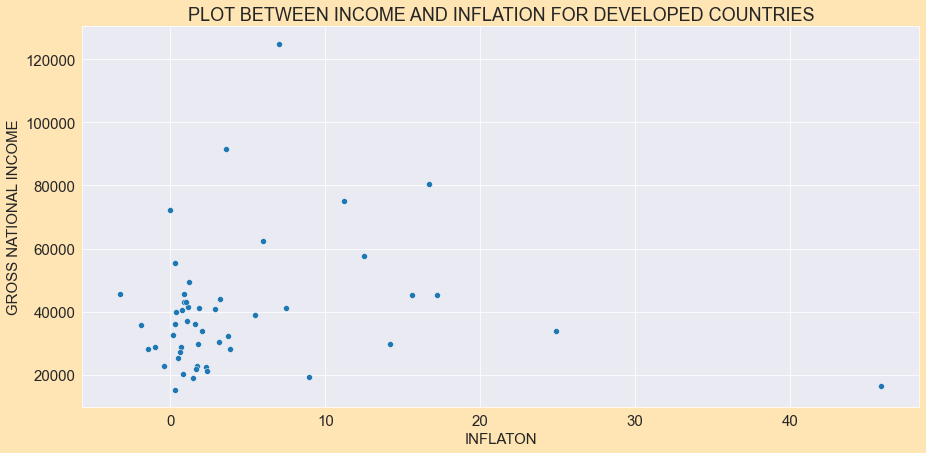

In [21]:
## plot between income and GDP for the developed countries

plt.rcParams['figure.figsize'] = (15,7)
plt.title('PLOT BETWEEN INCOME AND INFLATION FOR DEVELOPED COUNTRIES')
sns.scatterplot(y= 'income', x = 'inflation', data = mask_developed)



plt.xlabel('INFLATON')
plt.ylabel('GROSS NATIONAL INCOME')


Text(0, 0.5, 'GROSS NATIONAL INCOME')

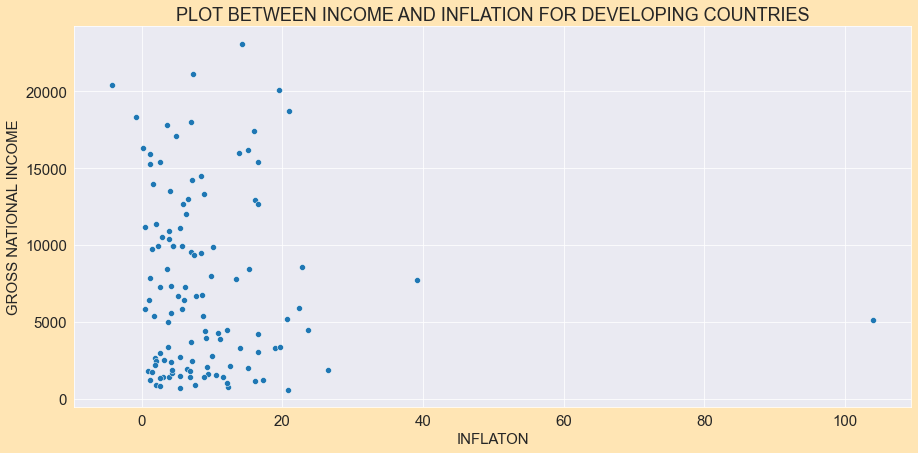

In [22]:
## plot between income and GDP for the developing countries

plt.rcParams['figure.figsize'] = (15,7)
plt.title('PLOT BETWEEN INCOME AND INFLATION FOR DEVELOPING COUNTRIES')
sns.scatterplot(y= 'income', x= 'inflation', data = mask_developing)



plt.xlabel('INFLATON')
plt.ylabel('GROSS NATIONAL INCOME')


Text(0, 0.5, 'GROSS DOMESTIC PRODUCTS')

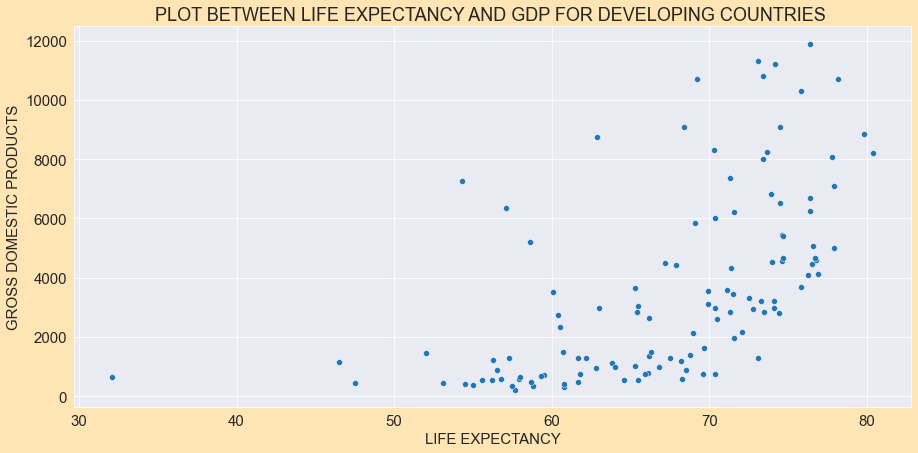

In [23]:
## plots of life expectancy and GDP for developing countries
plt.rcParams['figure.figsize'] = (15,7)
plt.title('PLOT BETWEEN LIFE EXPECTANCY AND GDP FOR DEVELOPING COUNTRIES ')
sns.scatterplot(x= 'life_expectancy', y = 'GDP', data = mask_developing)



plt.xlabel('LIFE EXPECTANCY')
plt.ylabel('GROSS DOMESTIC PRODUCTS')

Text(0.5, 0, 'GROSS DOMESTIC PRODUCTS')

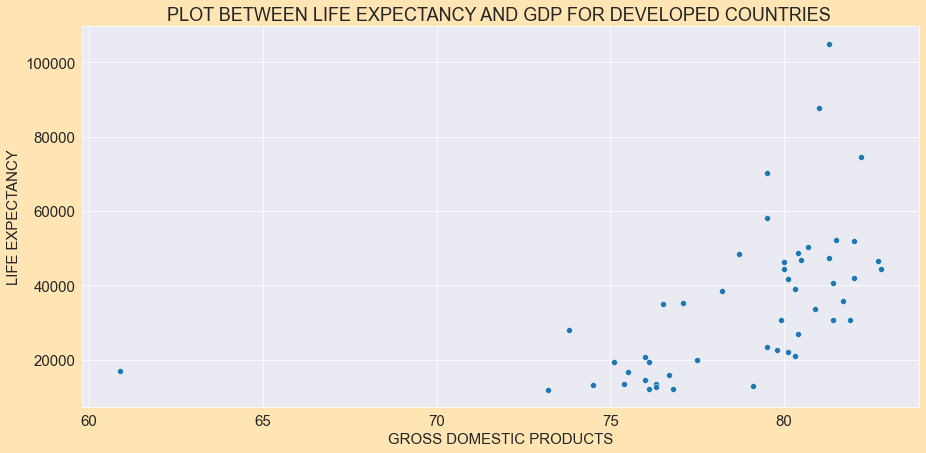

In [24]:
## plots of life expectancy and GDP for developed countries
plt.rcParams['figure.figsize'] = (15,7)
plt.title('PLOT BETWEEN LIFE EXPECTANCY AND GDP FOR DEVELOPED COUNTRIES ')
sns.scatterplot(x= 'life_expectancy', y = 'GDP', data = mask_developed)



plt.ylabel('LIFE EXPECTANCY')
plt.xlabel('GROSS DOMESTIC PRODUCTS')

Text(0.5, 28.99999999999995, 'LIFE EXPECTANCY')

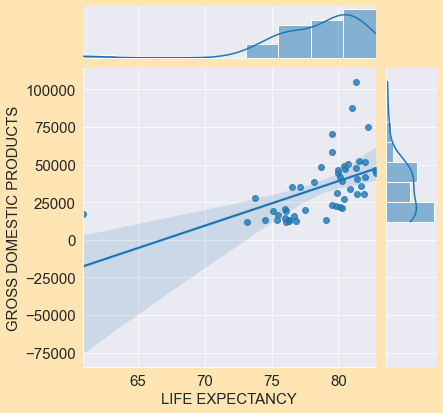

In [25]:
## plot of income and GDP
plt.rcParams['figure.figsize'] = (18,7)
sns. jointplot(x ='life_expectancy', y ='GDP', data = mask_developed, kind = 'reg' )

plt.ylabel('GROSS DOMESTIC PRODUCTS')
plt.xlabel('LIFE EXPECTANCY')

In [26]:
## BAR CHAT FOR THE LEAST LIFE EXPECTANCY COUNTRIES

life_expectancy = Data["life_expectancy"] <= 55
life_developing = Data[life_expectancy]
life_developing.head()

,Country_name,Child_Mortality,exports,Health,Products_Import,income,inflation,life_expectancy,total_fertility,GDP
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419


NameError: name 'xlabel' is not defined

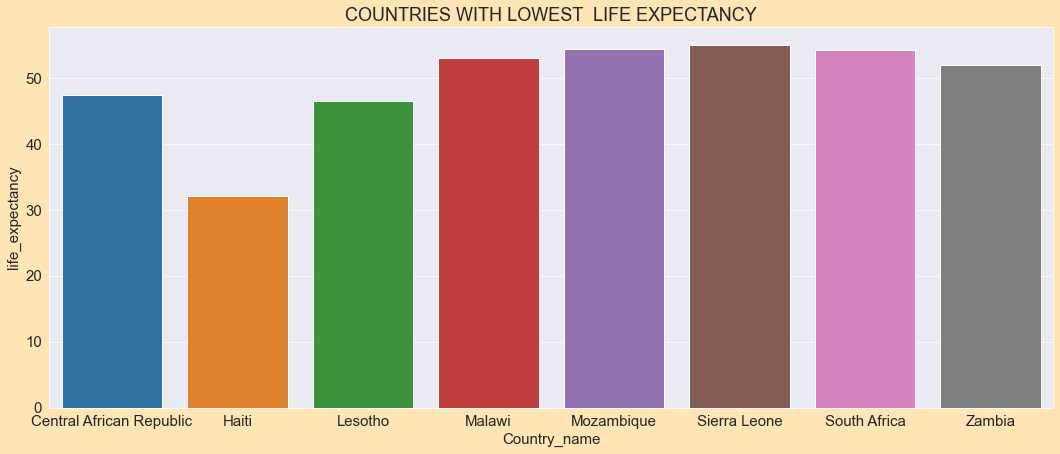

In [27]:
## lowest life expectancy
g = sns. barplot(x =  life_developing.Country_name, y =  life_developing.life_expectancy)
g.set_title( 'COUNTRIES WITH LOWEST  LIFE EXPECTANCY')
xlabel('Country_name')
ylabel('Life Expectancy')


In [28]:
## BAR CHAT FOR THE HIGHEST LIFE EXPECTANCY COUNTRIES

life_expectancy_HIGH = Data["life_expectancy"] >= 82
life_developing_HIGH = Data[life_expectancy_HIGH]
life_developing_HIGH.head()

,Country_name,Child_Mortality,exports,Health,Products_Import,income,inflation,life_expectancy,total_fertility,GDP
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600


NameError: name 'xlabel' is not defined

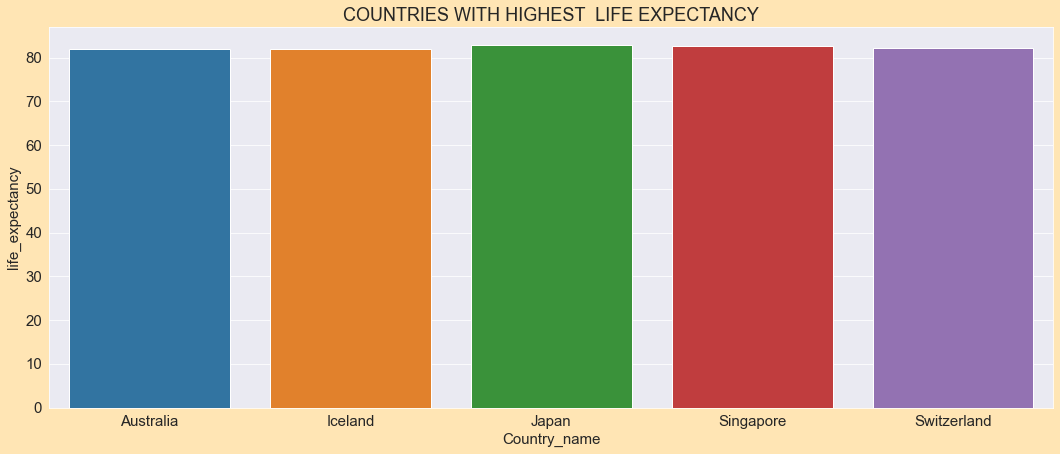

In [29]:
## hihest life expectancy
g = sns. barplot(x =  life_developing_HIGH.Country_name, y =  life_developing_HIGH.life_expectancy)
g.set_title( 'COUNTRIES WITH HIGHEST  LIFE EXPECTANCY')
xlabel('Country_name')
ylabel('Life Expectancy')


In [30]:
## BAR CHAT FOR THE HIGHEST GROSS DOMESTIC PRODUCT COUNTRIES

GDPS = Data["GDP"] > 50000
GDP_HIGH = Data[GDPS]
GDP_HIGH.head(20)

,Country_name,Child_Mortality,exports,Health,Products_Import,income,inflation,life_expectancy,total_fertility,GDP
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600


Text(0.5, 1.0, 'COUNTRIES WITH HIGHEST  GDP')

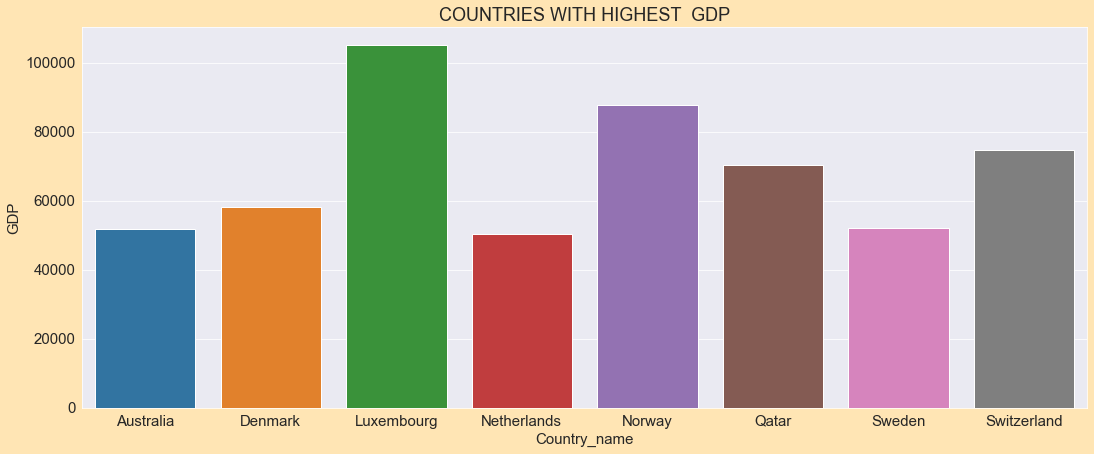

In [31]:
## plot for hihgest gdp
g = sns. barplot(x =  GDP_HIGH.Country_name, y =  GDP_HIGH.GDP)
g.set_title( 'COUNTRIES WITH HIGHEST  GDP')



In [32]:
## BAR CHAT FOR THE HIGHEST GROSS DOMESTIC PRODUCT COUNTRIES

GDP = Data["GDP"] < 450
GDP_low = Data[GDP]
GDP_low.head()

,Country_name,Child_Mortality,exports,Health,Products_Import,income,inflation,life_expectancy,total_fertility,GDP
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413


In [ ]:
## lowest gdp
g = sns. barplot(x =  GDP_low.Country_name, y =  GDP_low.GDP)
g.set_title( 'COUNTRIES WITH HIGHEST  GDP')


#  CONCLUSION
   
   * IN THE DEVELOPED COUNTRIES WHEN FERTILITY IS INCREASING THE CHILD MORTALITY DOES NOT INCREASE WHILE 
       ON THE DEVELOPING COUNTRIES PLOT, THE CHILD MORTALITY INCREASE AS THE FERTILITY INCREASE(i.e. LINEAR RELATIONSHIP)
       * ON DEVELOPED  COUNTRIES CHILD MORTALITY IS WITHIN 0 _ 20 AND FERTILITIES IS WITIN 0 _ 3.5
       * ON DEVELOPING  COUNTRIES CHILD MORTALITY IS WITHIN 0 _ 150 AND FERTILIES IS WITHIN 0 _ 8
       
   * ON THE EXPORT AND IMPORTS CHAT THERE IS A LINEAR RELATIONSHIP ON BOTH PLOTS
   
   * THERE IS A LINEAR RELATIONSHIP BETWEEN GNI AND GDP ON BOTH PLOTS
   
   * THERE IS PARALLEL RELATION BETWEEN THE GDP AND INFLATION I.E. AS THE GNP INCREASES THE INFLATION DOESNOT INCREASE
   
   * ON  LIFE EXPECTANCY AND GDP CHAT
       *THE RELATIONSHIP IS A NON LINEAR CURVE ON BOTH PLOTS.
       * THE DEVELOPING COUNTRIES HAVE LIVE EXPECTANCY VALUE THAT IS LESS THAN 70
       
   

# RECOMENDATION

* IN THE DEVELOPING COUNTRIES, THE GOVERNMENT SHOULD IMPROVE THE STANDARD OF LIVING

* INCREASE IN NUMBER OF EXPORTED GOODS, WHICH WILL AFFECT THE INCOME GENERATED BY THE COUNTRIES.

* CAUSES OF CHILD MOTALITY SHOULD BE EVALUATED AND RESOLVED IN THE DEVELOPING COUNTRIES.

# THANKS FOR LISTENING

In [ ]:
countries = Data.groupby('Country_name')[['GDP']].count().head()

countries.sort_values(['GDP','life_expectancy'], ascending= [True])

In [ ]:
fig, axes = plt.subplot(1,2, figsize = (16, 6))
plt.tight_layout(pad = 2)
xlabels = top_10.Country_name
axes[0].set_title('TOP 10 COUNTRIES GDP')
axes[0].set_xticklabels(xlabels, rotation =45, ha = 'right')
sns.barplot(x = Country_name, y = GDP, ax =axes[0])
axes[0].set_xlabel('COUNTRY NAME')
axes[0].set_ylabel('GROSS DOMESTIC PRODUCT')




In [ ]:
mask_developed.head()

In [ ]:
mask_developing.head()

In [ ]:
life = mask_developing.groupby("life_expectancy")

In [ ]:
life.head()